In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Backpropagation

Now that we have an idea of how to measure the impact of variables on a function’s output, we can begin to write the code to calculate these partial derivatives to see their role in minimizing the model’s loss. Before applying this to a complete neural network, let’s start with a simplified forward pass with just one neuron. Rather than backpropagating from the loss function for a full neural network, let’s backpropagate the ReLU function for a single neuron and act as if we intend to minimize the output for this single neuron. We’re first doing this only as a demonstration to simplify the explanation, since minimizing the output from a ReLU activated neuron doesn’t serve any purpose other than as an exercise. Minimizing the loss value is our end goal, but in this case, we’ll start by showing how we can leverage the chain rule with derivatives and partial derivatives to calculate the impact of each variable on the ReLU activated output. We’ll also start by minimizing this more basic output before jumping to the full network and overall loss.
Let’s quickly recall the forward pass and atomic operations that we need to perform for this single neuron and ReLU activation. We’ll use an example neuron with 3 inputs, which means that it also has 3 weights and a bias:
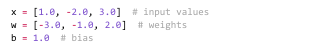

We then start with the first input, ​ x[​ 0 ​ ] ​ , and the related weight, ​ w[​ 0 ​ ] ​ :

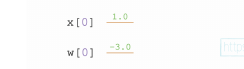
Figure 1:​ Beginning a forward pass with the first input and weight.

We have to multiply the input by the weight:
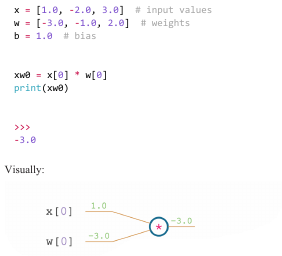
Figure 2:​ The first input and weight multiplication.

Let’s quickly recall the forward pass and atomic operations that we need to perform for this single neuron and ReLU activation. We’ll use an example neuron with 3 inputs, which means that it also has 3 weights and a bias:

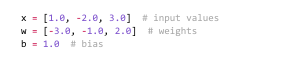
We then start with the first input, ​x[​0​]​, and the related weight, ​w[​0​]​:

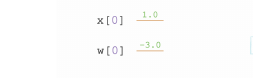
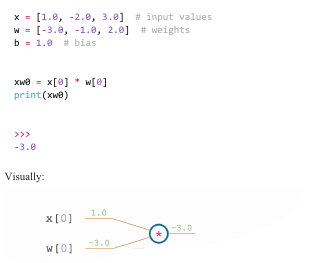


Figure 2:​ The first input and weight multiplication.

We repeat this operation for ​x1​, ​w1​ and ​x2​, ​w2​ pairs:

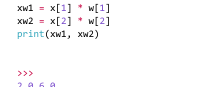

Visually:
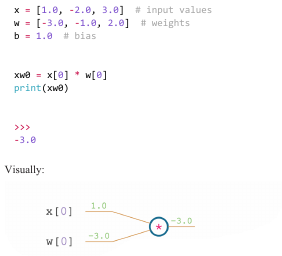

Figure 3:​ Input and weight multiplication of all of the inputs.

Code all together:

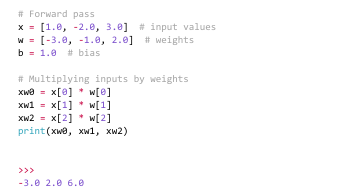

The next operation to perform is a sum of all weighted inputs with a bias:

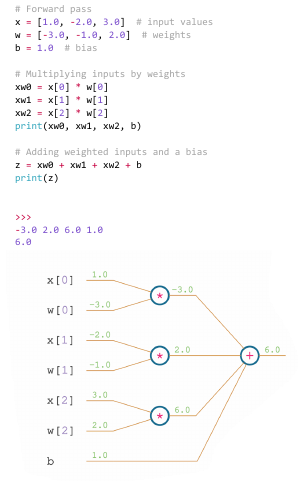
Figure 4:​ Weighted inputs and bias addition.

This forms the neuron’s output. The last step is to apply the ReLU activation function on this output:
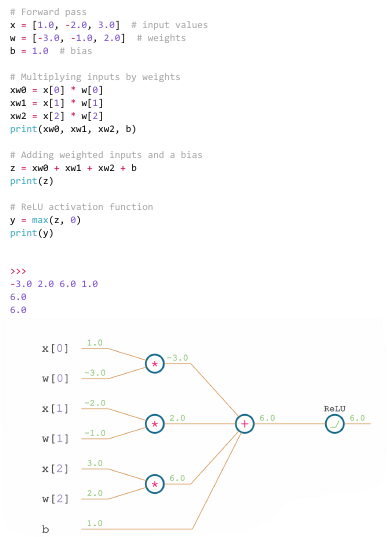



Figure 5:​ ReLU activation applied to the neuron output.

11 This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and bias (​b​), as inputs, and outputs ​y.​ This big function consists of multiple simpler functions — there is a multiplication of input values and weights, sum of these values and bias, as well as a ​max function as the ReLU activation — 3 chained functions in total: The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs. To do this, we’re going to use the ​chain rule​. Recall that the chain rule for a function stipulates that the derivative for nested functions like f(g(x))​ solves to:

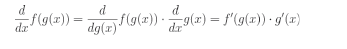

This big function that we just mentioned can be, in the context of our neural network, loosely interpreted as:

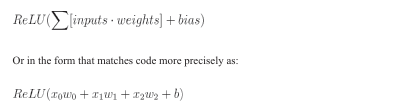

Our current task is to calculate how much each of the inputs, weights, and a bias impacts the output. We’ll start by considering what we need to calculate for the partial derivative of ​w​0,​ for example. But first, let’s rewrite our equation to the form that will allow us to determine how to calculate the derivatives more easily:

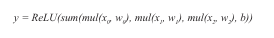
The above equation contains 3 nested functions: ​ReLU,​ a sum of weighted inputs and a bias, and multiplications of the inputs and weights. To calculate the impact of the example weight, ​w​0,​ on the output, the chain rule tells us to calculate the derivative of ​ReLU​ with respect to its parameter, which is the sum, then multiply it with the partial derivative of the sum operation with respect to its ​mul(x​0,​ w​0)​ ​ input, as this input contains the parameter in question. Then, multiply this with the partial derivative of the multiplication operation with respect to the ​x​0​ input. Let’s see this in a simplified equation:

This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and bias (​b​), as inputs, and outputs ​y.​ This big function consists of multiple simpler functions — there is a multiplication of input values and weights, sum of these values and bias, as well as a ​max function as the ReLU activation — 3 chained functions in total: The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs. To do this, we’re going to use the ​chain rule​. Recall that the chain rule for a function stipulates that the derivative for nested functions like f(g(x))​ solves to:


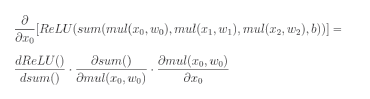

For legibility, we did not denote the ​ReLU(​ ) parameter, which is the full sum, and the sum parameters, which are all of the multiplications of inputs and weights. We excluded this because the equation would be longer and harder to read. This equation shows that we have to calculate the derivatives and partial derivatives of all of the atomic operations and multiply them to acquire the impact that x​0​ makes on the output. We can then repeat this to calculate all of the other remaining impacts. The derivatives with respect to the weights and a bias will inform us about their impact and will be used to update these weights and bias. The derivatives with respect to inputs are used to chain more layers by passing them to the previous function in the chain. We’ll have multiple chained layers of neurons in the neural network model, followed by the loss function. We want to know the impact of a given weight or bias on the loss. That means that we will have to calculate the derivative of the loss function (which we’ll do later in this chapter) and apply the chain rule with the derivatives of all activation functions and neurons in all of the consecutive layers. The derivative with respect to the layer’s inputs, as opposed to the derivative with respect to the weights and biases, is not used to update any parameters. Instead, it is used to chain to another layer (which is why we backpropagate to the previous layer in a chain). During the backward pass, we’ll calculate the derivative of the loss function, and use it to multiply with the derivative of the activation function of the output layer, then use this result to multiply by the derivative of the output layer, and so on, through all of the hidden layers and activation functions. Inside these layers, the derivative with respect to the weights and biases will form the gradients that we’ll use to update the weights and biases. The derivatives with respect to inputs will form the gradient to chain with the previous layer. This layer can calculate the impact of its weights and biases on the loss and backpropagate gradients on inputs further. For this example, let’s assume that our neuron receives a gradient of ​1​ from the next layer. We’re making up this value for demonstration purposes, and a value of ​1​ won’t change the values, which means that we can more easily show all of the processes. We are going to use the color of red for derivatives: